In [1]:
# importing all the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# preprocessing the data

data.drop('CustomerID' ,axis = 1 ,inplace = True)

In [5]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
gender_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [6]:
gender_mapping

{0: 'Female', 1: 'Male'}

In [8]:
# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # this would give back numpy array
scaled_data = pd.DataFrame(scaled_data , columns = data.columns)

In [9]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [10]:
# clustering 
max_clusters = 50

In [13]:
kmean_test = [KMeans(n_clusters = i , n_init = 10) for i in range(1 , max_clusters)]

In [14]:
kmean_test

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19),
 KMeans(n_clusters=20),
 KMeans(n_clusters=21),
 KMeans(n_clusters=22),
 KMeans(n_clusters=23),
 KMeans(n_clusters=24),
 KMeans(n_clusters=25),
 KMeans(n_clusters=26),
 KMeans(n_clusters=27),
 KMeans(n_clusters=28),
 KMeans(n_clusters=29),
 KMeans(n_clusters=30),
 KMeans(n_clusters=31),
 KMeans(n_clusters=32),
 KMeans(n_clusters=33),
 KMeans(n_clusters=34),
 KMeans(n_clusters=35),
 KMeans(n_clusters=36),
 KMeans(n_clusters=37),
 KMeans(n_clusters=38),
 KMeans(n_clusters=39),
 KMeans(n_clusters=40),
 KMeans(n_clusters=41),
 KMeans(n_clusters=42),
 KMeans(n_clu

In [16]:
inertias = [kmean_test[i].fit(scaled_data).inertia_ for i in range(len(kmean_test))]

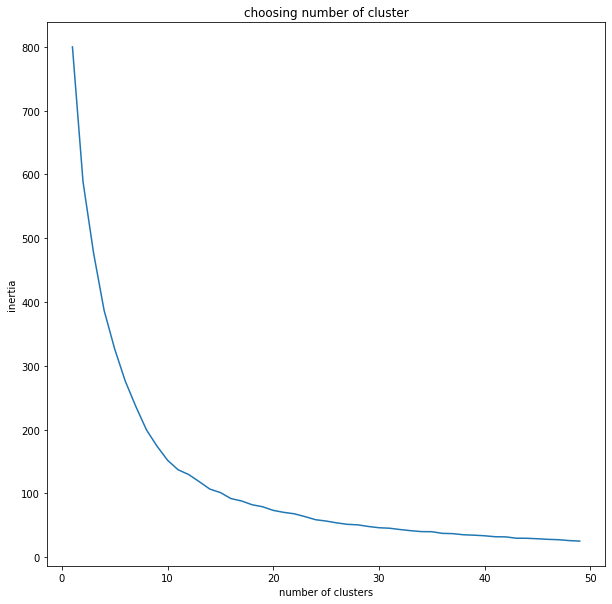

In [19]:
plt.figure(figsize = (10 , 10))
plt.plot(range(1 , max_clusters) , inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('choosing number of cluster')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 10 , n_init = 10) # n_Cluster based on elbow curve
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [23]:
clusters = kmeans.predict(scaled_data)

In [24]:
clusters

array([3, 3, 6, 9, 6, 9, 6, 9, 2, 9, 2, 9, 6, 9, 6, 3, 6, 3, 2, 9, 3, 3,
       6, 3, 6, 3, 6, 3, 6, 9, 2, 9, 2, 3, 6, 9, 6, 9, 6, 9, 7, 3, 2, 1,
       6, 9, 7, 1, 1, 1, 7, 3, 1, 2, 7, 2, 7, 2, 1, 2, 2, 3, 7, 7, 2, 3,
       7, 7, 3, 1, 2, 7, 7, 7, 2, 3, 7, 3, 1, 7, 2, 3, 2, 7, 1, 2, 7, 1,
       1, 7, 7, 3, 2, 1, 1, 3, 7, 1, 2, 3, 1, 7, 2, 3, 2, 1, 7, 2, 2, 2,
       2, 1, 1, 3, 1, 1, 7, 7, 7, 7, 3, 1, 1, 0, 1, 4, 5, 0, 2, 0, 5, 0,
       1, 4, 5, 4, 8, 0, 5, 4, 8, 0, 1, 4, 5, 0, 5, 4, 8, 0, 5, 0, 8, 4,
       8, 4, 5, 4, 5, 4, 7, 4, 5, 4, 5, 4, 5, 4, 8, 0, 5, 0, 5, 0, 8, 4,
       5, 0, 5, 0, 8, 4, 5, 4, 8, 0, 8, 0, 8, 4, 8, 4, 5, 4, 8, 4, 8, 0,
       5, 0], dtype=int32)

In [27]:
# pca -- > for getting better sense of our data

pca = PCA(n_components = 2)

reduced_data = pca.fit_transform(scaled_data)
reduced_data = pd.DataFrame(reduced_data , columns = ['PC1' , 'PC2'])

In [28]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [29]:
kmeans.cluster_centers_

array([[ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643]])

In [31]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
reduced_centers

array([[-0.88272588,  1.65431318],
       [-0.662429  , -0.58044771],
       [ 1.5303687 ,  0.17028966],
       [-0.68838314,  0.28733559],
       [-1.38150389,  0.3644368 ],
       [ 1.19961046,  1.30582744],
       [ 0.75229959, -1.61087948],
       [ 0.58233488, -0.85939176],
       [ 0.81659377,  0.24505923],
       [-1.6696024 , -1.35294268]])

In [34]:
reduced_data['cluster'] = clusters

In [35]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,3
1,-1.427673,-0.367310,3
2,0.050761,-1.894068,6
3,-1.694513,-1.631908,9
4,-0.313108,-1.810483,6
...,...,...,...
195,-1.179572,1.324568,4
196,0.672751,1.221061,8
197,-0.723719,2.765010,0
198,0.767096,2.861930,5


In [40]:
reduced_data[reduced_data['cluster'] == 3].loc[: , 'PC1']

0     -0.406383
1     -1.427673
15    -1.326131
17    -1.078425
20     0.488090
21    -1.018951
23    -0.722973
25    -1.062412
27    -0.206188
33    -1.873297
41    -1.578248
51    -0.281508
61    -0.840256
65    -0.996758
68    -0.947390
75    -0.469868
77     0.381292
81     0.095885
91    -0.519300
95    -0.516663
99    -0.634366
103   -0.498393
113   -0.604429
120   -0.476852
Name: PC1, dtype: float64

In [33]:
# data visualization 

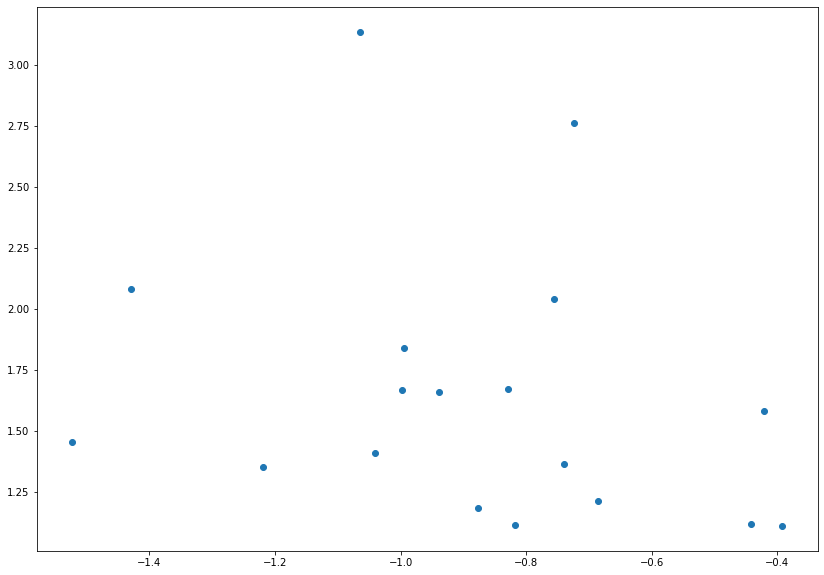

In [41]:
# exmaples that are clustered into the 0th cluster
plt.figure(figsize = (14, 10))
plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[: , 'PC1'] , reduced_data[reduced_data['cluster'] == 0].loc[: , 'PC2'])
plt.show()

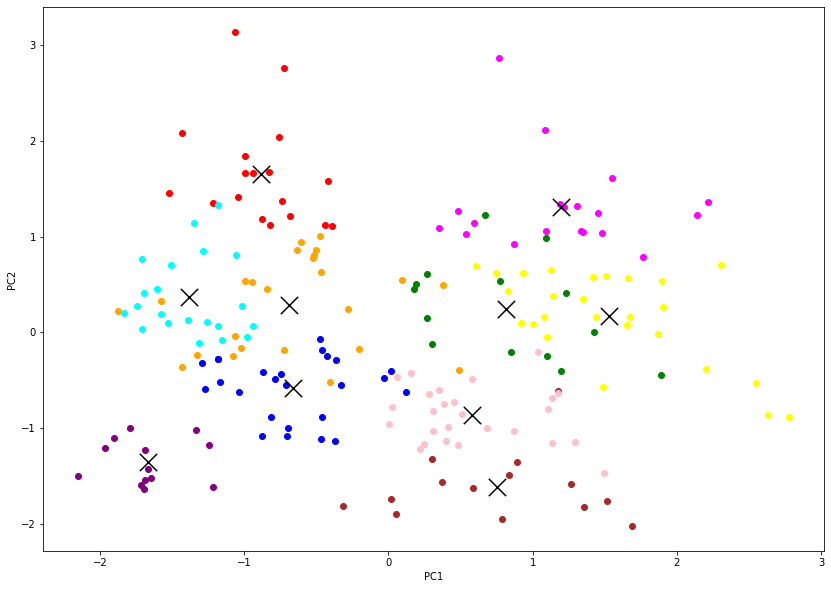

In [45]:
plt.figure(figsize = (14, 10))
plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 0].loc[: , 'PC2'],
            color = 'red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 1].loc[: , 'PC2'],
            color = 'blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 2].loc[: , 'PC2'],
            color = 'yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 3].loc[: , 'PC2'],
            color = 'orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 4].loc[: , 'PC2'],
            color = 'cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 5].loc[: , 'PC2'],
            color = 'magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 6].loc[: , 'PC2'],
            color = 'brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 7].loc[: , 'PC2'],
            color = 'pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 8].loc[: , 'PC2'],
            color = 'green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[: , 'PC1'] , 
            reduced_data[reduced_data['cluster'] == 9].loc[: , 'PC2'],
            color = 'purple')

plt.scatter(reduced_centers[:, 0] , reduced_centers[:,1] , color = 'black' , marker = 'x' , s = 300)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()